# Iris Dataset Clustering By:

# Mohamed Hamdy 

## Importing Libraries 

In [180]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Data Wrangling 


In [181]:
# Loading dataset for clustering
iris = datasets.load_iris()

In [182]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
df.shape # shape of rthe dataet 

(150, 4)

In [33]:
df.isnull().sum() # checking if any null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [37]:
# Check the duplicated row
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
142,5.8,2.7,5.1,1.9


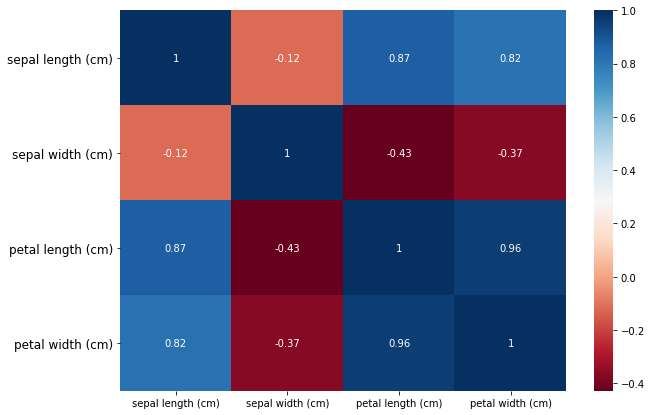

In [183]:
#Heatmap feature Correlation
plt.figure(figsize=(10,7))
s= sns.heatmap(df.corr(),annot=True,vmax=1,cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize = 12);

#### There is a strong positive relationship between sepal length and petal length&width

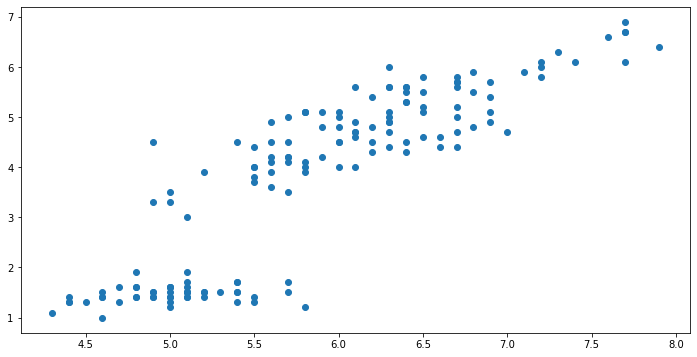

In [200]:
# Plotting a scatterplot between sepal length and petal length 
plt.figure(figsize=(12,6))
plt.scatter(df['sepal length (cm)'],df['petal length (cm)']);

In [201]:
# standardization 
scaler = StandardScaler()
seg_strd = scaler.fit_transform(df)

## Model-1: Hairarchial clustering 

In [202]:
# creating a hierarchy object 
hier_mod = linkage(seg_strd,method='ward') 

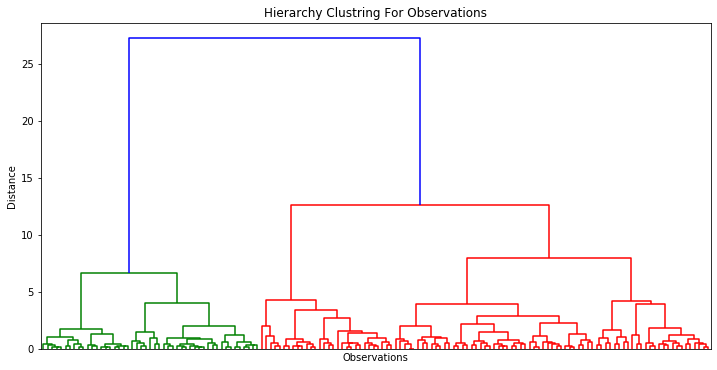

In [258]:
# Plotting the Hierarchy Graph to see how many clusters we can choose with 
plt.figure(figsize=(12,6))
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.title('Hierarchy Clustring For Observations')
dendrogram(hier_mod,show_leaf_counts = False
           ,no_labels=True,truncate_mode = 'level',p=10);

## K-Means Clustering 

In [204]:
# starting with 10 clusters and fit k means clustering to the data
wcss = [] 
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) 
    kmeans.fit(df_strd)
    wcss.append(kmeans.inertia_)
    

C:\Users\muham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


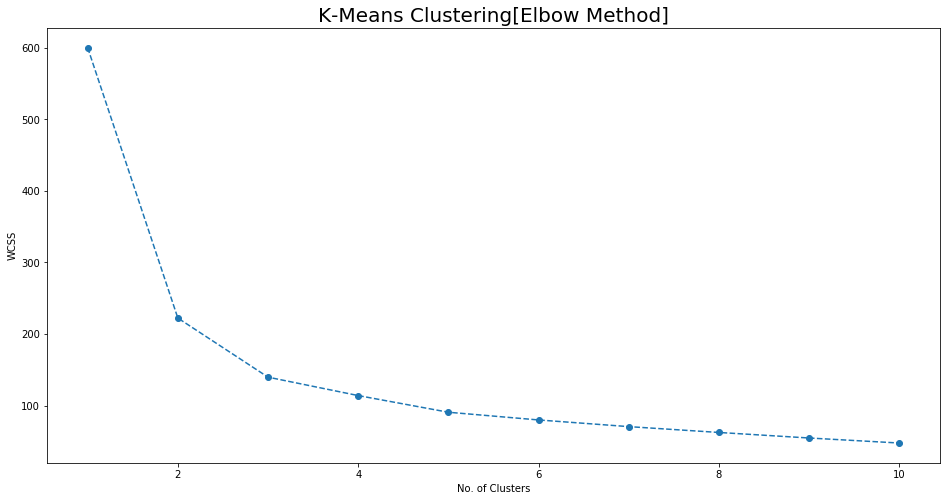

In [205]:
# Plotting within cluster sum of squares and No.of clusters
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss,marker ='o',  linestyle='--')
plt.xlabel ('No. of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering[Elbow Method]',fontsize=20);

#### From elbow method we can choose 3 number of clusters  

In [206]:
 # iniate kmeans by 3 clusters 
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
kmeans.fit(seg_strd)

KMeans(n_clusters=3, random_state=42)

In [207]:
 # creating a copy from the original dataset for convienience
df_strd_seg = df.copy()

In [208]:
df_strd_seg.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [211]:
# Add labels column to the dataframe
df_strd_seg['Segment_labels'] = kmeans.labels_

In [212]:
df_strd_seg.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Segment_labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [213]:
# Renaming the segment's column by the original names 
df_strd_seg['Segment_labels'] = df_strd_seg['Segment_labels'].map({0:'Iris-setosa',1:'Iris-versicolor',
                                                                  2:'Iris-virginica'})

In [214]:
df_strd_seg.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Segment_labels
0,5.1,3.5,1.4,0.2,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-versicolor


In [215]:
# The averahe length and width for each flower 
df_strd_seg.groupby(['Segment_labels']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Segment_labels,,,,
Iris-setosa,6.780851,3.095745,5.510638,1.972340
Iris-versicolor,5.006000,3.428000,1.462000,0.246000
Iris-virginica,5.801887,2.673585,4.369811,1.413208


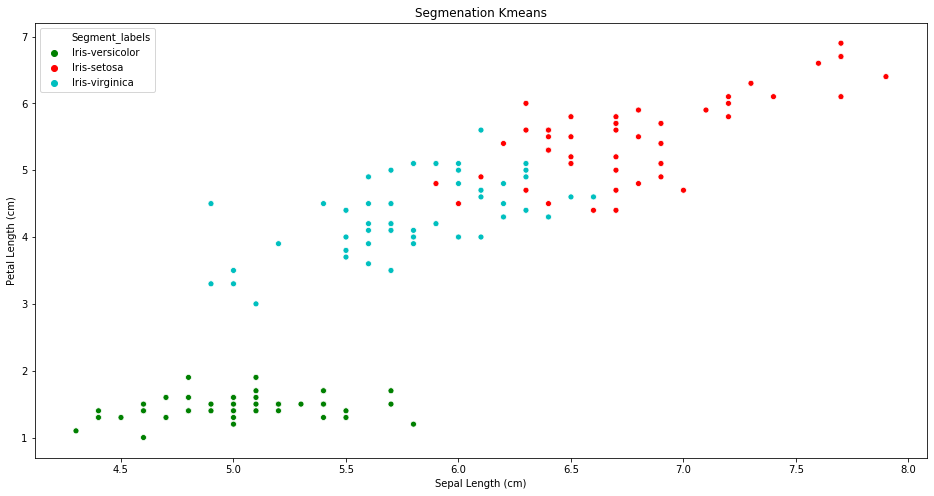

In [216]:
# Plotting scatterplot betweeen sepal length and petal length after creating the clusters 
plt.figure(figsize=(16,8))
x = df_strd_seg['sepal length (cm)']
y = df_strd_seg['petal length (cm)']
sns.scatterplot(x,y,hue=df_strd_seg['Segment_labels'], palette = ['g','r','c'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Segmenation Kmeans');

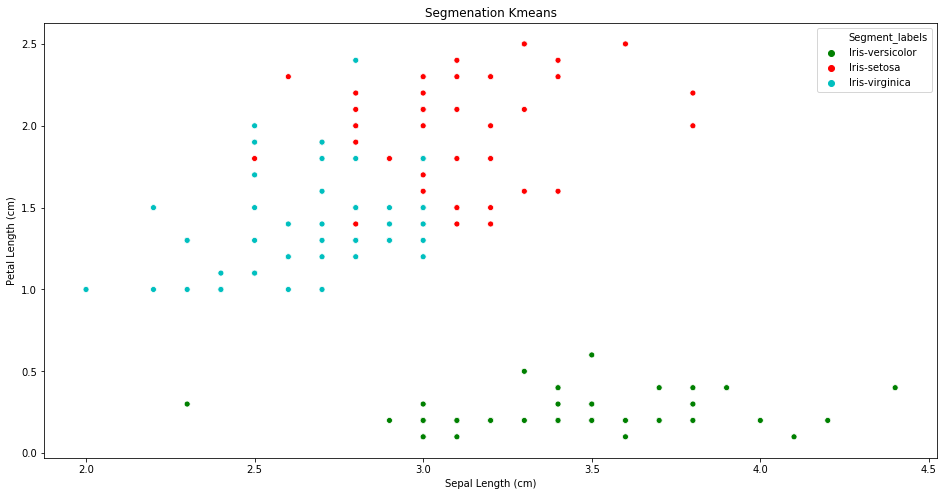

In [198]:
# Plotting scatterplot betweeen sepal width and petal width after creating the clusters 
plt.figure(figsize=(16,8))
x = df_strd_seg['sepal width (cm)']
y = df_strd_seg['petal width (cm)']
sns.scatterplot(x,y,hue=df_strd_seg['Segment_labels'], palette = ['g','r','c'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Segmenation Kmeans');

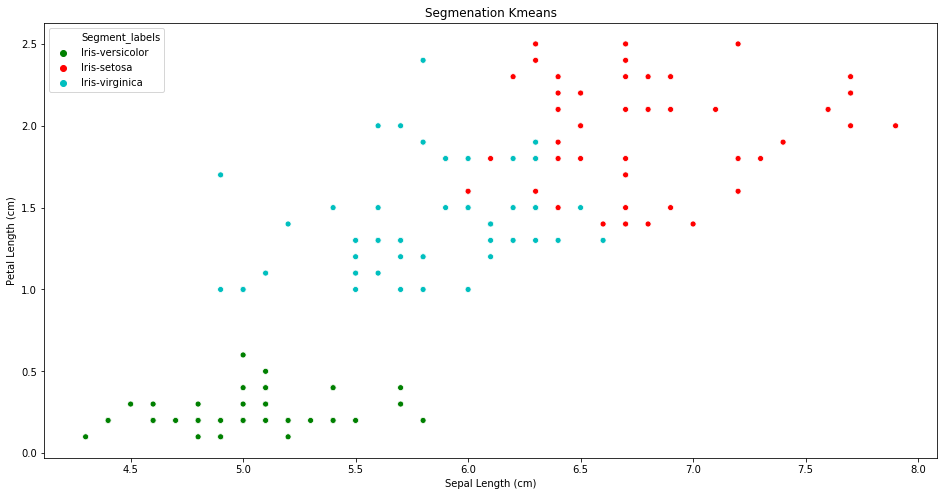

In [199]:
# Plotting scatterplot betweeen sepal length and petal width after creating the clusters 
plt.figure(figsize=(16,8))
x = df_strd_seg['sepal length (cm)']
y = df_strd_seg['petal width (cm)']
sns.scatterplot(x,y,hue=df_strd_seg['Segment_labels'], palette = ['g','r','c'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Segmenation Kmeans');

#### We can see that petal width and sepal length are the best features to use for better clustering

In [117]:
df_strd_seg.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Segment_labels
0,5.1,3.5,1.4,0.2,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-versicolor


In [118]:
df_strd_seg.shape

(150, 5)

## Loading Iris dataset [The Labeled One]

In [235]:
 # Loading the local CSV
df_labeled = pd.read_csv('Iris.csv')

In [236]:
df_labeled .head() # first 5 rows 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Performing Logistic Regression on the Clustered Dataset

In [237]:
# importing required libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [239]:
 # Defining X, y
X = df_labeled[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df_labeled['Species']

In [240]:
 # splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [241]:
# Creating a logistic regression object
log_mod=LogisticRegression()

In [242]:
 # fitting the model
log_mod.fit(x_train,y_train)

LogisticRegression()

In [243]:
# Y prediction 
y_pred = log_mod.predict(x_test)

In [244]:
# estimiating model accuracy 
metrics.accuracy_score(y_pred,y_test)

1.0

## SVM

In [245]:
from sklearn.svm import SVC

In [246]:
svm_mod = SVC()

In [247]:
svm_mod.fit(x_train,y_train)

SVC()

In [248]:
y_pred_svm = svm_mod.predict(x_test)

In [249]:
print ("The accuracy of SVM Model is: ",format(metrics.accuracy_score(y_pred_svm ,y_test)))


The accuracy of SVM Model is:  1.0


## Decision Tree


In [250]:
tree_mod = DecisionTreeClassifier()

In [251]:
tree_mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [252]:
y_pred_tree = tree_mod.predict(x_test)

In [253]:
print ("The accuracy of DecisionTree Model is: ",format(metrics.accuracy_score(y_pred_tree ,y_test)))

The accuracy of DecisionTree Model is:  1.0


## Naive Bayes

In [254]:
naive_mod = GaussianNB()

In [255]:
naive_mod.fit(x_train,y_train)

GaussianNB()

In [256]:
y_pred_naive = naive_mod.predict(x_test)

In [257]:
print ("The accuracy of Naive Bayes Model is: ",format(metrics.accuracy_score(y_pred_naive ,y_test)))

The accuracy of Naive Bayes Model is:  1.0
